# Problem statement - Main questions

* How can we get computers to understand the information in language?

* How can we represent meaning? - for example the similarity between two words

### Solution1

* Let's represent each word with a unique ID
* Word meaning defined by synonyms and "is a" relationships (WordNet)
  * create a lexical database, based on dictionaries and thesaurus

Examples:
- *panda* is a living thing
- *panda* is an animal
- *panda* is a mammal


- adjective: good, just, beneficial


Create a vocabulary of words ("all words" or most frequent words) and assign a unique index to each word.

In [1]:
vocabulary = {
    "apple" :1,
    "banana": 2,
    "fruit": 3,
    "bear": 4,
    "snake": 5,
    "animal": 6,
    "big": 7,
    "huge": 8,
}

is_a_relationship = {
    1: 3,
    2: 3,
    4: 6,
    5: 6,
}

synonyms = {
    7: 8,
    8: 7,
}

print('Lexical Database')
print(f'apple is a fruit: {vocabulary["apple"]} is_a {vocabulary["fruit"]}')
print(f'banana is a fruit: {vocabulary["banana"]} is_a {vocabulary["fruit"]}')

print(f'bear is an animal: {vocabulary["bear"]} is_a {vocabulary["animal"]}')
print(f'snake is an animal: {vocabulary["snake"]} is_a {vocabulary["animal"]}')

print(f'big is synonym of huge: {vocabulary["big"]} ~ {vocabulary["huge"]}')


Lexical Database
apple is a fruit: 1 is_a 3
banana is a fruit: 2 is_a 3
bear is an animal: 4 is_a 6
snake is an animal: 5 is_a 6
big is synonym of huge: 7 ~ 8


Issues1


IDs - suggest misleading relationships (categorical-nominal data)
  * the model can assume natural ordering between the words, which might result in poor predictions
   * average words or predicts halfway between IDs (2:fruit + 6:animal) / 2 = 4:bear
   * two ID numbers which are close in value, might or might not be related (depending on vocabulary ordering)



In [2]:
# One-Hot Encoding
# binary value added for each category/each word in the dictionary

# "apple","banana","fruit","bear","snake","animal","big","huge"
#   y/n,   y/n,     y/n,    y/n,   y/n,    y/n,     y/n,  y/n

vocabulary_one_hot_encoding = {
    "apple": [1,0,0,0,0,0,0,0],
    "banana":[0,1,0,0,0,0,0,0],
    "fruit": [0,0,1,0,0,0,0,0],
    "bear":  [0,0,0,1,0,0,0,0],
    "snake": [0,0,0,0,1,0,0,0],
    "animal":[0,0,0,0,0,1,0,0],
    "big":   [0,0,0,0,0,0,1,0],
    "huge":  [0,0,0,0,0,0,0,1],
}

Issues2
- vocabulary size is huge (number of words)^2
- representations totally independent, but it would be better to have a way to encode meaningful similarity


In [3]:
print('"big" & "huge" are more similar')
print(vocabulary_one_hot_encoding["big"])
print(vocabulary_one_hot_encoding["huge"])
print()
print('"big" & "animal" are less similar')
print(vocabulary_one_hot_encoding["big"])
print(vocabulary_one_hot_encoding["animal"])

"big" & "huge" are more similar
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 1]

"big" & "animal" are less similar
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 0]


### Solution2
* Let's represent words with vectors
* Word meaning defined by its context, other words that frequently appead close-by (Deep Learning)

If we use many context we can build up a good representation of words.

- Jane deposited some money in the ***bank*** across the street 
  - bank context: money, street
- John drove to the river ***bank***, so he could fish in the afternoon 
  - bank context: river, fish


# Word Vectors - Word Embeddings - Neural Word Representations

* represent words as vectors of numbers
* each dimension corresponds to some kind of meaning component
* the number value in each dimension signal how closly does the word match with that meaning component



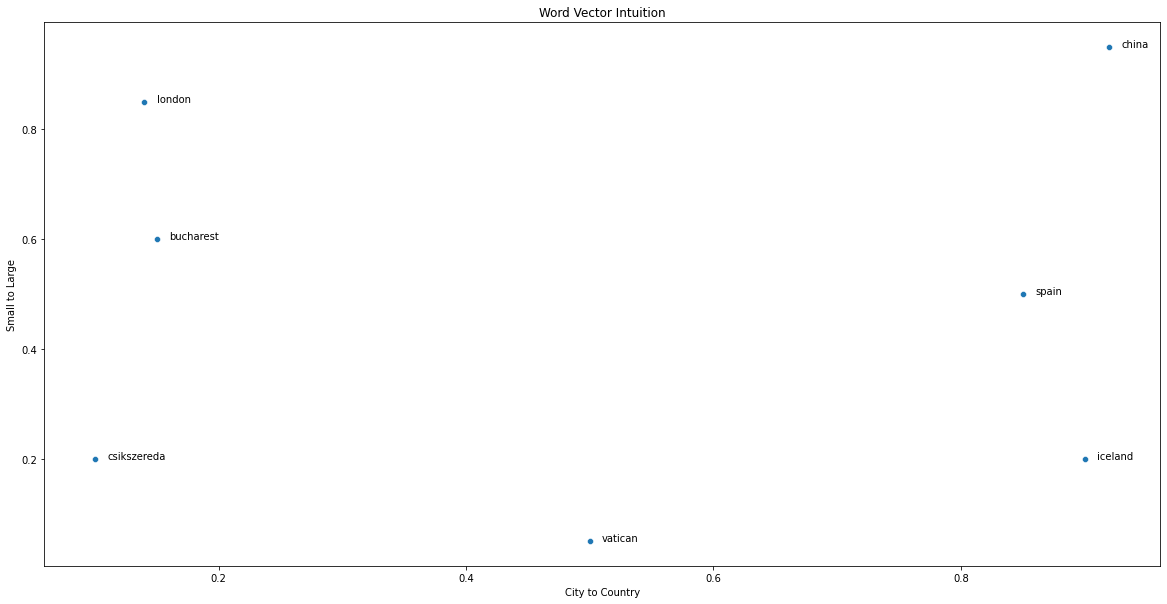

In [4]:
# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
  # store plot outputs within the notebook document
%matplotlib inline

example_data = [
  {'label': "london", 'small_large': 0.85, 'city_country': 0.14 },
  {'label': "bucharest", 'small_large': 0.6, 'city_country': 0.15 },
  {'label': "csikszereda", 'small_large': 0.2, 'city_country': 0.1 },
  {'label': "vatican", 'small_large': 0.05, 'city_country': 0.5 },
  {'label': "china", 'small_large': 0.95, 'city_country': 0.92 },
  {'label': "spain",'small_large': 0.5, 'city_country': 0.85 },
  {'label': "iceland",'small_large': 0.2, 'city_country': 0.9 },
]
example_data_x = [e['city_country'] for e in example_data]
example_data_y = [e['small_large'] for e in example_data]
example_data_labelr = [e['label'] for e in example_data]

plt.figure(figsize=(20,10))
plt.title('Word Vector Intuition')
plt.xlabel('City to Country')
plt.ylabel('Small to Large')

ax1 = sns.scatterplot(x=example_data_x, y=example_data_y)


for e in example_data:
  ax1.text(e['city_country']+0.01, e['small_large'],e['label'])

First introduced in 

2013 - Word2Vec paper (Mikolov et al) - framework for learning word vectors

- use large body of text
- start by assigning a random vector to each word
- go through each position in the text
- adjust vectors to increase the similarity of words next to each other

2014 - GloVe paper (Pennington et al) - and improved version, Global Vectors for Word Representation

- 50-300 dimensions to represent words and word meanings
- we will use the smaller vectors of 100 dimensions, which still gives good results

In [5]:
# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
  # store plot outputs within the notebook document
%matplotlib inline

# efficient numerical computation library
import numpy as np


# word and text similarity modeling library
import gensim.downloader
from gensim.models import KeyedVectors

In [6]:
model = gensim.downloader.load('glove-wiki-gigaword-100')
print(type(model))

[==================================================] 100.0% 128.1/128.1MB downloaded
<class 'gensim.models.keyedvectors.Word2VecKeyedVectors'>


In [7]:
model['bread']

array([-0.66146  ,  0.94335  , -0.72214  ,  0.17403  , -0.42524  ,
        0.36303  ,  1.0135   , -0.14802  ,  0.25817  , -0.20326  ,
       -0.64338  ,  0.16632  ,  0.61518  ,  1.397    , -0.094506 ,
        0.0041843, -0.18976  , -0.55421  , -0.39371  , -0.22501  ,
       -0.34643  ,  0.32076  ,  0.34395  , -0.7034   ,  0.23932  ,
        0.69951  , -0.16461  , -0.31819  , -0.34034  , -0.44906  ,
       -0.069667 ,  0.35348  ,  0.17498  , -0.95057  , -0.2209   ,
        1.0647   ,  0.23231  ,  0.32569  ,  0.47662  , -1.1206   ,
        0.28168  , -0.75172  , -0.54654  , -0.66337  ,  0.34804  ,
       -0.69058  , -0.77092  , -0.40167  , -0.069351 , -0.049238 ,
       -0.39351  ,  0.16735  , -0.14512  ,  1.0083   , -1.0608   ,
       -0.87314  , -0.29339  ,  0.68278  ,  0.61634  , -0.088844 ,
        0.88094  ,  0.099809 , -0.27161  , -0.58026  ,  0.50364  ,
       -0.93814  ,  0.67576  , -0.43124  , -0.10517  , -1.2404   ,
       -0.74353  ,  0.28637  ,  0.29012  ,  0.89377  ,  0.6740

In [11]:
model.

[('flour', 0.7654520869255066),
 ('baked', 0.7607272267341614),
 ('cake', 0.7605516910552979),
 ('loaf', 0.7457114458084106),
 ('toast', 0.7397798895835876),
 ('cheese', 0.7374634742736816),
 ('potato', 0.7367483973503113),
 ('butter', 0.7279619574546814),
 ('potatoes', 0.7085272669792175),
 ('pasta', 0.7071877121925354),
 ('cream', 0.7038493156433105),
 ('pizza', 0.7006676197052002),
 ('cakes', 0.6977077722549438),
 ('meal', 0.697089433670044),
 ('soup', 0.6961817145347595),
 ('sandwiches', 0.6888641715049744),
 ('sandwich', 0.6839388608932495),
 ('cereal', 0.6807155609130859),
 ('pie', 0.6770038604736328),
 ('breads', 0.6754506826400757),
 ('cooked', 0.6732531189918518),
 ('chicken', 0.6731168627738953),
 ('coffee', 0.6727856397628784),
 ('pudding', 0.6725996732711792),
 ('dough', 0.6713131070137024),
 ('baking', 0.6687313318252563),
 ('chocolate', 0.6674816608428955),
 ('salad', 0.6664866805076599),
 ('meat', 0.6651197671890259),
 ('beans', 0.6633191704750061)]

# Arithmetic with words

In [12]:
# start with a capital city + madrid 
# substract the country component - spain
# add another country component + romania
# result, get back the capital of the new country

res = model.most_similar(positive=['madrid','romania'], negative=['spain'])
res

[('bucharest', 0.8163406848907471),
 ('prague', 0.6872164607048035),
 ('kiev', 0.6810169219970703),
 ('bulgaria', 0.6501622796058655),
 ('dinamo', 0.6471318006515503),
 ('bratislava', 0.643454909324646),
 ('sofia', 0.6213629841804504),
 ('milan', 0.6208837628364563),
 ('budapest', 0.6180620193481445),
 ('belgrade', 0.6156076192855835)]

In [17]:
def analogy_isto(X1, istoX2, Y1):
  top10 = model.most_similar(positive=[istoX2,Y1], negative=[X1])
  return [res for res in top10[:2]]
analogy_isto('man','king','woman')

[('queen', 0.7698541283607483), ('monarch', 0.6843380928039551)]

In [15]:
analogy_isto('germany','beer','france') # start with drink, substract/add country

[('wine', 0.727996289730072), ('drink', 0.720828652381897)]

In [16]:
analogy_isto('brush','painting','camera') # start with activity, substrac/add tool

[('photography', 0.6530632972717285), ('video', 0.6090030670166016)]

In [42]:
analogy_isto('strong','stronger','weak')
analogy_isto('university','professor','school')
analogy_isto('1','2','3')
analogy_isto('love','red','hate')
analogy_isto('usa','obama','russia')


[('putin', 0.6142481565475464), ('schroeder', 0.6141209602355957)]

In [28]:
analogy_isto('10','20','30')
analogy_isto('computer','mouse','screen')
analogy_isto('running','shoe','swimming')
analogy_isto('running','shoe','tennis')
analogy_isto('beer','wine','rum')
analogy_isto('usa','obama','hungary')

[('vinegar', 0.609582781791687), ('molasses', 0.5919457674026489)]

In [40]:
# knift + death
model.most_similar(positive=['knife','death'])
model.most_similar(positive=['hollywood','leonardo'])

[('movie', 0.7190172672271729),
 ('dicaprio', 0.7174627184867859),
 ('film', 0.6953262090682983),
 ('oscar', 0.6703886389732361),
 ('scorsese', 0.6633287668228149),
 ('films', 0.6405961513519287),
 ('stars', 0.6307629346847534),
 ('movies', 0.6271800398826599),
 ('star', 0.6258776187896729),
 ('actor', 0.6129760146141052)]

In [ ]:
# horse - farm
model.most_similar(positive=['horse'], negative=['farm'])

[('chariot', 0.5327478647232056),
 ('pommel', 0.5269886255264282),
 ('dettori', 0.5212792754173279),
 ('bareback', 0.5077942609786987),
 ('jockey', 0.5064937472343445),
 ('charioteer', 0.49806684255599976),
 ('rider', 0.4843164086341858),
 ('preakness', 0.4827725291252136),
 ('cyclist', 0.478039026260376),
 ('filly', 0.47298672795295715)]

In [41]:
model.most_similar(positive=['love'], negative=['red'])
model.most_similar(positive=['house'], negative=['building'])

[('armey', 0.5409634113311768),
 ('pelosi', 0.5377663969993591),
 ('newt', 0.5049062967300415),
 ('gephardt', 0.49785351753234863),
 ('gingrich', 0.49341267347335815),
 ('gop', 0.4894966185092926),
 ('congressman', 0.4831312298774719),
 ('lott', 0.48190760612487793),
 ('rep.', 0.46081918478012085),
 ('mcconnell', 0.4583998918533325)]

Can you find other cool/interesting relationships in the data?

In [43]:
# ml library, used here for dimensionality reduction
# Linear dimensionality reduction project data to a lower dimensional space
from sklearn.decomposition import PCA

def display_pca_scatterplot(model,words):
  word_vectors = np.array([model[w] for w in words])

  two_dim_vectors = PCA().fit_transform(word_vectors)[:,:2]

  plt.figure(figsize=(6,6))
  plt.scatter(two_dim_vectors[:,0], two_dim_vectors[:,1])
  for w, (x,y) in zip(words, two_dim_vectors):
    plt.annotate(w, (x,y), xytext=(x+0.05,y+0.05))

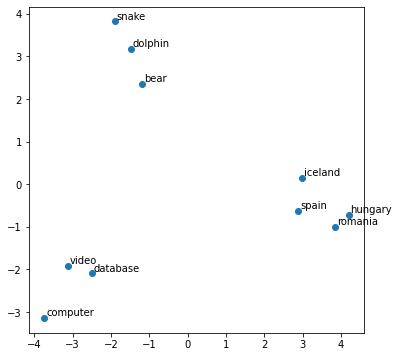

In [45]:
display_pca_scatterplot(model,['hungary','spain','romania', 'iceland', 'bear', 'snake', 'dolphin','computer','database','video',])

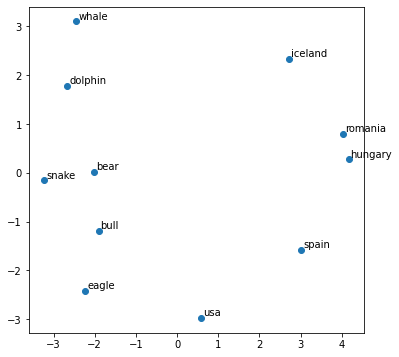

In [48]:
display_pca_scatterplot(model,['hungary','spain','romania', 'iceland', 'bear', 'snake', 'dolphin','eagle','bull','usa','whale'])

Can you find sets of words that map in different regions, based on meanings?

# How does all this work?

* Where do we get the vectors from? 
* How do we calculate them?

- Start with randomly initialized vectors
- Go through whole corpus (body of text) and for each word try to predict surrounding words
  - use similarity of word vectors as a probabilty of appearing in each other's context
  - this similarity / probabilty distribution is deifned as: dot product of center word and context word
- Update word vectors based on actual surrounding words
  - update in way to increase the probabilty (the dot product value)
  - "learning", using partial derivatives,iteratively update vectors based on real text in order to maximize similarity/probability
  - so that they can predict surrounding words better


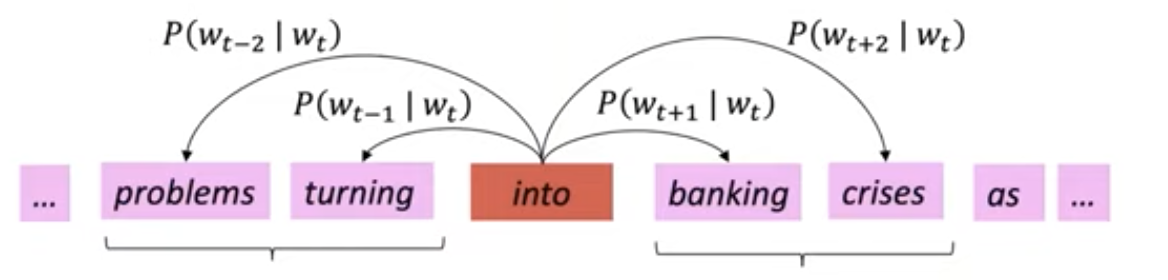

# How to calculate similarity?


**Dot Product**

	- scalar product / inner product - x1 * x2 + y1 * y2
	- projection product - |x|*|y|*cos 

Can be used to calculate similarity:
- vector components that point in the same direction add a positive value
- opposite directions result in a negative value
- perpendicular values cancel each other out



In [49]:
a = np.array([10,2])
b = np.array([5,-3])
c = np.array([-1,-10])

print(f'a . b = {np.dot(a,b)}')
print(f'a . c = {np.dot(a,c)}')
print(f'b . c = {np.dot(b,c)}')

a . b = 44
a . c = -30
b . c = 25


In [51]:
model.similarity('table','tables')

0.8021163

In [52]:
model.similarity('bear','wolf')

0.68515104

In [ ]:
model.similarity('banana','river')

0.2149211

In [ ]:
model.similarity('boat','river')

0.4580168

# Key learnings


* A surprising result - word meaning can be represented well by large vectors of numbers
* These vectors can be calculated using a "simple" task of calculating and updating distributional similarities



References

- [Stanford Online: NLP with Deep Learning
](https://www.youtube.com/watch?v=rmVRLeJRkl4&list=PLoROMvodv4rOSH4v6133s9LFPRHjEmbmJ&index=1)
- [Gensim - python library for easy use of word vectors and topic modeling](https://radimrehurek.com/gensim/auto_examples/index.html#documentation)